In [17]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 13185 images belonging to 35 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 2597 images belonging to 35 classes.


In [53]:
cnn = tf.keras.models.Sequential()

In [54]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[128, 128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [56]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [57]:
cnn.add(tf.keras.layers.Flatten())

In [58]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [59]:
cnn.add(tf.keras.layers.Dense(units=35 , activation='softmax'))

In [60]:
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [61]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 45)

Epoch 1/45
413/413 [==============================] - 311s 751ms/step - loss: 3.5265 - accuracy: 0.0799 - val_loss: 3.2033 - val_accuracy: 0.1363
Epoch 2/45
413/413 [==============================] - 398s 963ms/step - loss: 3.1819 - accuracy: 0.1399 - val_loss: 3.1452 - val_accuracy: 0.1563
Epoch 3/45
413/413 [==============================] - 401s 969ms/step - loss: 2.9753 - accuracy: 0.1928 - val_loss: 2.6884 - val_accuracy: 0.2699
Epoch 4/45
413/413 [==============================] - 387s 938ms/step - loss: 2.7692 - accuracy: 0.2504 - val_loss: 2.4454 - val_accuracy: 0.3365
Epoch 5/45
413/413 [==============================] - 384s 928ms/step - loss: 2.5794 - accuracy: 0.3041 - val_loss: 2.4458 - val_accuracy: 0.3489
Epoch 6/45
413/413 [==============================] - 346s 836ms/step - loss: 2.4066 - accuracy: 0.3394 - val_loss: 2.2990 - val_accuracy: 0.3612
Epoch 7/45
413/413 [==============================] - 331s 802ms/step - loss: 2.2531 - accuracy: 0.3835 - val_loss: 1.8778 -

In [71]:
result = cnn.evaluate(test_set,batch_size=32)
print("test_loss, test accuracy",result)

82/82 [==============================] - 18s 216ms/step - loss: 0.3219 - accuracy: 0.9072
test_loss, test accuracy [0.3218672573566437, 0.9072006344795227]


In [72]:
cnn.save('SC.h5')

In [73]:
import pickle

In [78]:
with open("SC.pickle","wb") as file:
    pickle.dump(cnn, file)

In [80]:
model_json = cnn.to_json()
with open("SC.json", "w") as json_file:
    json_file.write(model_json)
cnn.save_weights("SC_weights.h5")

In [20]:
from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array

model1 = load_model('./SC.h5',compile=False)  

In [21]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [22]:
def output(location):
    img=load_img(location,target_size=(128,128,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 359ms/step


'agkistrodon-contortrix'

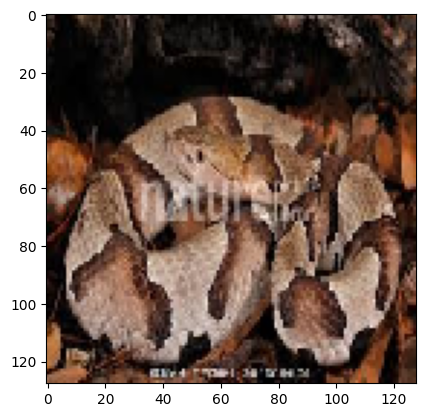

In [23]:
img='./predict/test1.jpg'
pic=load_img('./predict/test1.jpg',target_size=(128,128,3))
plt.imshow(pic)
output(img)